# Lesson 6.3 正则化与sklearn逻辑回归参数详解

在了解了sklearn的一些常用的操作之后，接下来，我们来详细探讨关于正则化的相关内容，并就sklearn中的逻辑回归的参数进行详细解释。需要注意的是，由于sklearn内部参数的一致性，有许多参数不仅是逻辑回归的参数，更是大多数分类模型的通用参数。

In [52]:
# 科学计算模块
import numpy as np
import pandas as pd

# 画图模块
import matplotlib.pyplot as plt

# 机器学习模块
from ML_basic_function import *

### 四、过拟合，正则化，特征衍生与特征重要性评估

在上一小节中，我们已经尝试着利用逻辑回归构建了一个多分类模型，得益于sklearn中良好的默认参数设置，我们在对sklearn中内部构造基本没有任何了解的情况下就完成了相关模型的建模。但需要知道的事，逻辑回归作为一个诞生时间较早并且拥有深厚统计学背景的模型，其实是拥有非常多变种应用方法的，虽然我们在Lesson4中就逻辑回归的基本原理、基础公式以及分类性能进行了较长时间的探讨，但实际上逻辑回归算法的模型形态和应用方式远不仅于此。而在sklearn中，则提供了非常丰富的逻辑回归的可选的算法参数，相当于是提供了一个集大成者的逻辑回归模型。

当然，首先我们需要介绍一个非常重要的机器学习中的概念，正则化。在逻辑回归的说明文档中，第一个参数就是关于正则化的一个选项：

In [53]:
from sklearn.linear_model import LogisticRegression
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

也就是penalty:=I2'一项，而正则化也是机器学习中非常通用的一项操作。接下来，我们就正则化的相关内容展开讨论。

### 1.正则化的基本概念

![Alt text](image-107.png)

从说明文档中得知，就是在sklearn中，逻辑回归模型是默认进行正则化的，即上文所述“Regularization
is applied by default'”，这是一种在机器学习建模过程中常见的用法，但并非统计学常用方法。据此我们也
知道了统计学和机器学习方法之间的又一个区别，并且能够清楚的感受到skea是一个非常“机器学习"的
算法库，很多时候会从便于机器学习建模的角度出发对算法进行微调，而这也是sklearr算法库的一大特
性，这个特性在导致其非常易用的同时，也使得其很多算法和原始提出的算法会存在略微的区别，这点也
是初学者需要注意的。

* 什么是正则化/如何进行正则化

其实机器学习中正则化(regularization)的外在形式非常简单，就是在模型的损失函数中加上一个正则
化项(regularizer),有时也被称为惩罚项(penalty term),如下方程所示，其中L为损失函数，J为正则
化项。通常来说，正则化项往往是关于模型参数的1-范数或者2-范数，当然也有可能是这两者的某种结
合，例如sklearn的逻辑回归中的弹性网正则化项，其中加入模型参数的1-范数的正则化也被称为1正则
化，加入模型参数的2-范数的正则化也被称为2正则化。

$$
\frac{1}{N} \sum_{i=1}^N L\left(y_i, f\left(x_i\right)\right)+\lambda J(f)
$$

* 为何需要正则化

正则化的过程比不复杂，但何时需要进行正则化呢？

一般来说，正则化核心的作用是缓解模型过拟合倾向，此外，由于加入正则化项后损失函数的形体发
生了变化，因此也会影响损失函数的求解过程，在某些时候，加入了正则化项之后会让损失函数的求解变
得更加高效。如此前介绍的岭回归，其实就是在线性回归的损失函数基础上加入了w的1-范数，而Lasso则
是加入了w的2-范数。并且，对于逻辑回归来说，如果加入L2正则化项，损失函数就会变成严格的凸函数。

* 经验风险与结构风险

要讨论正则化是如何缓解过拟合倾向的问题，需要引入两个非常重要的概念：经验风险和结构风险。

在我们构建损失函数求最小值的过程，其实就是依据以往经验（也就是训练数据）追求风险最小（以往数据误差最小）的过程，而在给定一组参数后计算得出的损失函数的损失值，其实就是经验风险。而所谓结构风险，我们可以将其等价为模型复杂程度，模型越复杂，模型结构风险就越大。而正则化后的损失函数在进行最小值求解的过程中，其实是希望损失函数本身和正则化项都取得较小的值，即模型的经验风险和结构风险能够同时得到控制。

模型的经验风险需要被控制不难理解，因为我们希望模型能够尽可能的捕捉原始数据中的规律，但为何模型的结构风险也需要被控制？核心原因在于，尽管在一定范围内模型复杂度增加能够有效提升模型性能，但模型过于复杂可能会导致另一个非常常见的问题一模型过拟合，关于模型过拟合的概念我们稍后会进行更加详细的介绍，但总的来说，一旦模型过拟合了，尽管模型经验风险在降低、但模型的泛化能力会下降。因此，为了控制模型过拟合倾向，我们可以把模型结构风险纳入损失函数中一并考虑，当模型结构风险的增速高于损失值降低的收益时，我们就需要停止参数训练（迭代）。

![Alt text](image-108.png)

> 同时要求模型性能和模型复杂度都在一个合理的范围内，其实等价于希望训练得到一个较小的模型同时具有较好的解释数据的能力（规律捕捉能力），这也符合奥卡姆剃刀原则。

### 2.过拟合概念介绍

此前我们曾深入探讨过关于机器学习建模有效性的问题，彼时我们得出的结论是当训练数据和新数据具有规律的一致性时，才能够进行建模，而只有挖掘出贯穿始终的规律（同时影响训练数据和新数据的规律），模型才能够进行有效预测。不过，既然有些贯穿始终的全局规律，那就肯定存在一些只影响了一部分数据的局部规律。一般来说，由于全局规律影响数据较多，因此更容易被挖掘，而局部规律只影响部分数据，因此更难被挖掘，因此从较为宽泛的角度来看，但伴随着模型性能提升，也是能够捕获很多局部规律的。但是需要知道的是，局部规律对于新数据的预测并不能起到正面的作用，反而会影响预测结果，此时就出现模型过拟合现象。我们可以通过如下实例进行说明：

In [54]:
# 随机数种子
np.random.seed(123)

# 创建数据
n_dots = 20
X = np.linspace(0, 1, n_dots)
Y = np.sqrt(X) + 0.2*np.random.rand(n_dots) - 0.1

In [55]:
X

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [56]:
Y

array([0.03929384, 0.1866436 , 0.26981313, 0.40762266, 0.50272526,
       0.49761047, 0.65810433, 0.64394293, 0.64507206, 0.66667071,
       0.69411185, 0.80669585, 0.78243386, 0.73910577, 0.83800393,
       0.9361224 , 0.85416128, 0.88099565, 0.9796388 , 1.00636552])

其中，x是一个0到1之间等距分布20各点组成的ndarray，$ y = sqrt(x) + r $其中r是人为制造的随机噪声，在[-0.1，0.1]之间服从均匀分布。然后我们借助numpy的polyfit函数来进行多项式拟合，polyfit函数会根据设置的多项式阶数，在给定数据的基础上利用最小二乘法进行拟合，并返回拟合后各阶系数。该函数更多相关参数详见numpy..oolynomial..polynomial..polyfit"官网APl讲解。同时，当系数计算完成后，我们还常用ploy1d函数逆向构造多项式方程，进而利用方程求解y,该函数用法参见numpy.poly1d官网说明。

例如人为制造一个二阶多项式方程然后进行二阶拟合实验

In [57]:
y0 = X ** 2
np.polyfit(X, y0, 2)

array([1.00000000e+00, 1.45411135e-16, 2.30100782e-17])

能够得出多项式各阶系数，而根据该系数可用ploy1d逆向构造多项式方程

In [58]:
p = np.poly1d(np.polyfit(X, y0, 2))
print(p)

   2
1 x + 1.454e-16 x + 2.301e-17


In [59]:
print(np.poly1d(np.polyfit(X, Y, 3)))

      3         2
1.91 x - 3.616 x + 2.674 x + 0.04912


接下来，进行多项式拟合。分别利用1阶x多项式、3阶x多项式和10阶x多项式来拟合y。并利用图形观察多项式的拟合度，首先我们可定义一个辅助画图函数，方便后续我们将图形画于一张画布中，进而方便观察

In [60]:
def plot_polynomial_fit(x, y, degree):
    p = np.poly1d(np.polyfit(x, y, degree))
    t = np.linspace(0, 1, 200)
    plt.plot(x, y, 'ro', t, p(t), '-', t, np.sqrt(t), 'r--')

其中，t为[0,1]中等距分布的100个点，而p是deg参数决定的多项式回归拟合方程，p(t)即为拟合方程x输入t值时多项式输出结果，此处plot_polynomial_fit函数用于生成同时包含(x,y)原始值组成的红色点图、(t,p（t）)组成的默认颜色的曲线图、(t, np.sqrt（t）)构成的红色虚线曲线图。测试3阶多项式拟合结果

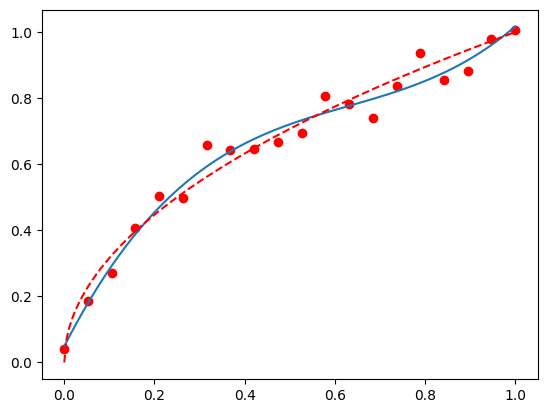

In [61]:
plot_polynomial_fit(X, Y, 3)

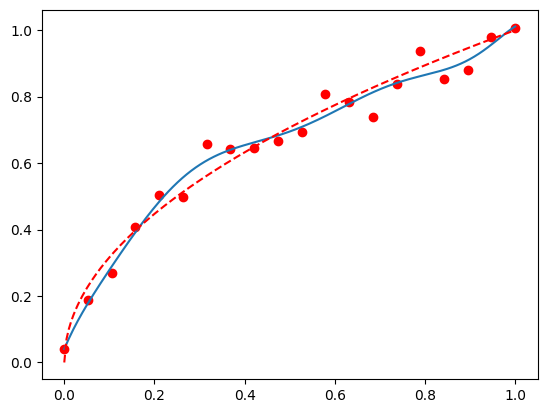

In [62]:
plot_polynomial_fit(X, Y, 8)

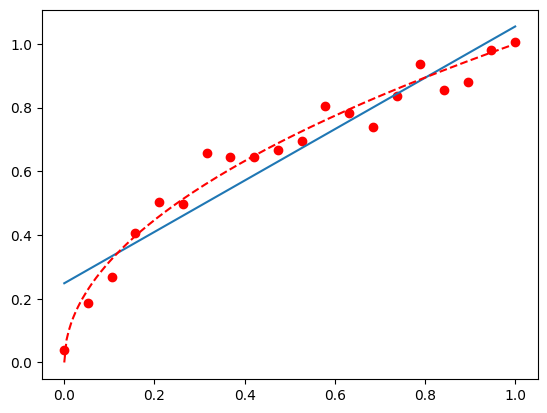

In [63]:
plot_polynomial_fit(X, Y, 1)

### 3.正则化进行特征筛选与缓解过拟合倾向

接下来，我们尝试如何通过在模型中加入正则化项来缓解10阶多项式回归的过拟合倾向。为了更加符合sklearn的建模风格、从而能够使用sklearn的诸多方法，我们将上述10阶多项式建模转化为一个等价的形式，即在原始数据中衍生出几个特征，分别是x2、x3、...... 、x10,然后带入线性回归方程进行建模

In [64]:
x_l = []
for i in range(10):
    x_tem = np.power(X, i+1).reshape(-1, 1)
    x_l.append(x_tem)

In [65]:
x = np.concatenate(x_l, axis=1)

In [66]:
x[:2]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.26315789e-02, 2.77008310e-03, 1.45793847e-04, 7.67336039e-06,
        4.03861073e-07, 2.12558460e-08, 1.11872874e-09, 5.88804597e-11,
        3.09897157e-12, 1.63103767e-13]])

In [67]:
Y

array([0.03929384, 0.1866436 , 0.26981313, 0.40762266, 0.50272526,
       0.49761047, 0.65810433, 0.64394293, 0.64507206, 0.66667071,
       0.69411185, 0.80669585, 0.78243386, 0.73910577, 0.83800393,
       0.9361224 , 0.85416128, 0.88099565, 0.9796388 , 1.00636552])

当然，上述过程其实也就是比较简单的一种特征衍生方法，该方法也可以通过sklearn中的PolynomialFeatures类来进行实现。

In [68]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures?

Init signature:
PolynomialFeatures(
    degree=2,
    *,
    interaction_only=False,
    include_bias=True,
    order='C',
)
Docstring:     
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

Read more in the :ref:`User Guide <polynomial_features>`.

Parameters
----------
degree : int or tuple (min_degree, max_degree), default=2
    If a single int is given, it specifies the maximal degree of the
    polynomial features. If a tuple `(min_degree, max_degree)` is passed,
    then `min_degree` is the minimum and `max_degree` is the maximum
    polynomial degree of the generated features. Note that `min_degree=0`
    and `min_degree=1` are equivalent as outputting the degree zero term is
    determined by `include_bi

![Alt text](image-109.png)

此处虽然重点介绍关于正则化和2正则化对模型过拟合效果抑制的效果，但实际上，从上述过程中，我们其实能够总结一套建模策略：

* 当模型效果（往往是线性模型）不佳时，可以考虑通过特征衍生的方式来进行数据的“增强”；

* 如果出现过拟合趋势，则首先可以考虑进行不重要特征的筛选，过多的无关特征其实也会影响模型对于全局规律的判断，当然此时可以考虑使用L1正则化配合线性方程进行特征重要性筛选，剔除不重要的特征，保留重要特征；

* 对于过拟合趋势的抑制，仅仅踢出不重要特征还是不够的，对于线性方程类的模型来说，L2正则化则是缓解过拟合非常好的方法，配合特征筛选，能够快速的缓解模型过拟合倾向；

当然，除此以外，还有一些注意事项：

* 首先，哪怕不进行特征筛选，2正则化也可以帮助线性方程抑制过拟合，但特征太多其实会影响2正则化的参数取值范围，进而影响alpha参数惩罚力度的有效性；

* 其次，上述参数的选取和过拟合倾向的判断，其实还是主观判断成分较多，一个更加严谨的流程是，先进行数据集的划分，然后选取更能表示模型泛化能力的评估指标，然后将特征提取（如果要做的话）、L2正则化后的线性方程组成一个Pipeline.,再利用网格搜索，确定一组最优的参数组合。相关方法我们会在下一小节进行介绍。

* 最后，需要强调的是，并非所有模型都需要何以通过正则化来进行过拟合修正，典型的可以通过正则化来进行过拟合倾向修正的模型主要有线性回归、逻辑回归、LDA、SVM以及一些PCA衍生算法（如SparsePCA)。而树模型则不用通过正则化来进行过拟合修正。

## 五、sklearn中逻辑回归的参数解释

在补充了关于正则化的相关内容之后，接下来，我们来详细讨论关于逻辑回归的参数解释。

![Alt text](image-110.png)

### 1、说明文档中的内容解释

首先，先对上述逻辑回归的说明文档中的内容进行解释。

* sklearn中逻辑回归损失函数形态

在了解了正则化的相关内容后，接下来我们观察sklearn官网中给出的逻辑回归加入正则化后的损失函数表达式，我们发现该表达式和此前我们推到的交叉熵损失函数的表达式还是略有差异，核心原因是sklearn在二分类的时候默认两个类别的标签取值为-1和1，而不是0和1。我们曾在Lesson4.2中进行了非常详细的关于逻辑回归损失函数的推导，此处的数学推导，我们只需将Lessor4.2中公式当中的y的取值改为-1和1即可，相关推导过程留作课后习练习。

* 正则化后损失函数表达式

相比原始损失函数，正则化后的损失函数有两处发生了变化，其一是在原损失函数基础上乘以了系数C,其二则是加入了正则化项。其中系数C也是超参数，需要人工输入，用于调整经验风险部分和结构风险部分的权重，C越大，经验风险部分权重越大，反之结构风险部分权重越大。此外，在L2正则化时，采用的 $\frac{w^T w}{2}$ 表达式，其实相当于是各参数的平方和除以2，在求最小值时本质上和w的2-范数起到的作用相同，省2去开平方是为了简化运算，而除以2则是为了方便后续求导运算，和2次方结果相消。

另外，sklearn中还提供了弹性网正则化方法，其实是通过p控制L1正则化和L2正则化惩罚力度的权重，是一个更加综合的解决方案。不过代价是增加了一个超参数，并且由于损失函数形态发生了变化，导致部分优化方法无法使用。

### 2.sklearn中逻辑回归评估器的参数解释

在上述的一系列基础内容铺垫之后，接下来我们对逻辑回归评估器中的参数进行详细解释：

In [75]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

![Alt text](image-111.png)

* dual:是否求解对偶问题

对偶问题是约束条件相反、求解方向也相反的问题，当数据集过小而特征较多时，求解对偶问题能一定程度降低运算复杂度，其他情况建议保留默认参数取值。

* class_weight:各类样本权重

class_weight其实代表各类样本在进行损失函数计算时的数值权重，例如假设一个二分类问题，0、1两类的样本比例是2:1，此时可以输入一个字典类型对象用于说明两类样本在进行损失值计算时的权重，例如输入：{0:1,1:3)，则代表1类样本的每一条数据在进行损失函数值的计算时都会在原始数值上3。而当我们将该参数选为balanced时，则会自动将这个比例调整为真实样本比例的反比，以达到平衡的效果。

* solver:损失函数求解方法

其实除了最小二乘法和梯度下降以外，还有非常多的关于损失函数的求解方法，而选择损失函数的参数，就是solver参数。

其实除了最小二乘法和梯度下降以外，还有非常多的关于损失函数的求解方法，而选择损失函数的参数，就是solver参数。

而当前损失函数到底采用何种优化方法进行求解，其实最终目的是希望能够更快（计算效率更高）更好（准确性更高）的来进行求解，而硬性的约束条件是损失函数的形态，此外则是用户自行选择的空间。我们很难一次性将所有的优化方法一次性介绍完整，但我们可以给出何时应该用哪种so的参考列表，也就是官网给出的列表：

至此，我们即完成逻辑回归所有参数的解释，当然对于这些参数更深层次的理解，则需要长期的积淀、以及其他知识的补充。下一小节，也是Lesson6的最后一小节，我们将利用sklearn中的逻辑回归、结合此前介绍的正则化相关内容，来进行一次综合调参练习。深化正则化方法使用情况的理解、同时进一步介绍sklearn中另一个至关重要的方法一网格搜索。